In [21]:
import pandas as pd
data = pd.read_csv('../classification/datasets/hr.csv')
# using data.copy() to create a new DataFrame, keeping the original data intact
df = data.copy()
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [22]:
# Section 1: Dataset Description - Exploring the dataset
# gaining some insights into the data especially the data types of the columns
# metadata
print(f"Shape of dataset: {df.shape}")
print("Columns in the dataset:")
print(df.info())

Shape of dataset: (311, 36)
Columns in the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null

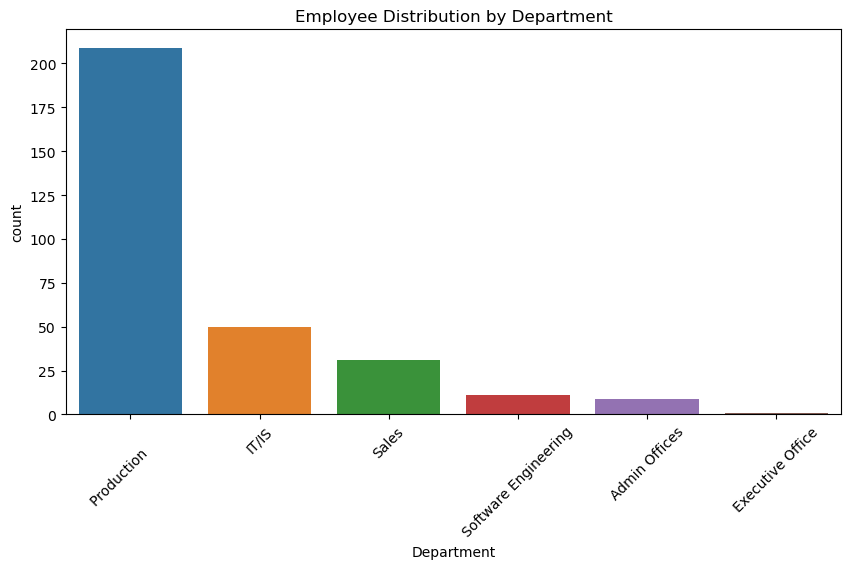

In [23]:
# TODO: section 2: visualizations
# Familiarize the readers with the dataset through some informative statistics and charts.
import matplotlib.pyplot as plt
import seaborn as sns

# Employee distribution by department
plt.figure(figsize=(10, 5))
sns.countplot(x='Department', data=df, order=df['Department'].value_counts().index)
plt.title('Employee Distribution by Department')
plt.xticks(rotation=45)
plt.show()

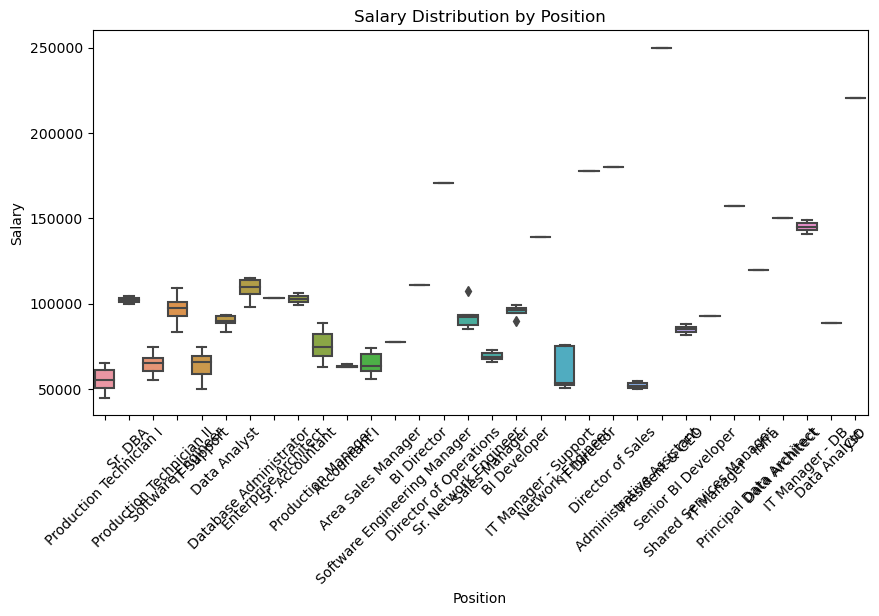

In [24]:
# Average salary by position
plt.figure(figsize=(10, 5))
sns.boxplot(x='Position', y='Salary', data=df)
plt.title('Salary Distribution by Position')
plt.xticks(rotation=45)
plt.show()

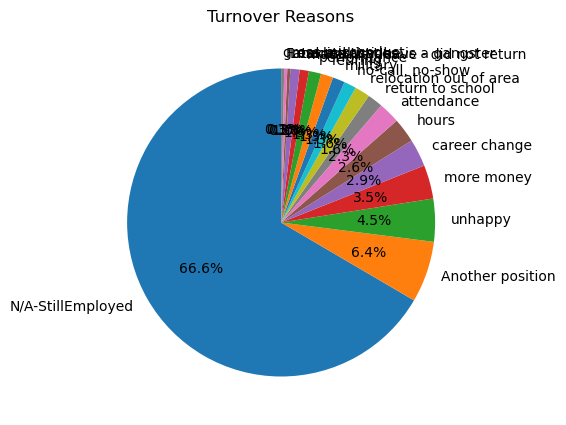

In [25]:
# Turnover reasons
turnover_reasons = df['TermReason'].value_counts()
plt.figure(figsize=(8, 5))
turnover_reasons.plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Turnover Reasons')
plt.ylabel('')
plt.show()

In [ ]:
# Scatter plot: EngagementSurvey vs. EmpSatisfaction
plt.figure(figsize=(8, 5))
sns.scatterplot(x='EngagementSurvey', y='EmpSatisfaction', data=df)
plt.title('Engagement Survey vs. Employee Satisfaction')
plt.show()

In [ ]:
# Section 3: Data Preprocessing
# (Data Cleaning, Data Integration, Data Transformation, Data Reduction)
# Clearly explain the preprocessing step with key details.


# as a first step, we're starting to clean the data and 
print("Missing values per column:")
print(df.isnull().sum())

# especially getting rid of the ID related columns which are not useful for the model
id_columns = [col for col in df.columns if col.endswith('ID')]
df_cleaned = df.drop(columns=id_columns)

# handling missing values
df_cleaned.fillna(0, inplace=True)

print("Remaining columns after dropping ID-related columns:")
print(df_cleaned.columns)

Missing values per column:
Employee_Name                   0
EmpID                           0
MarriedID                       0
MaritalStatusID                 0
GenderID                        0
EmpStatusID                     0
DeptID                          0
PerfScoreID                     0
FromDiversityJobFairID          0
Salary                          0
Termd                           0
PositionID                      0
Position                        0
State                           0
Zip                             0
DOB                             0
Sex                             0
MaritalDesc                     0
CitizenDesc                     0
HispanicLatino                  0
RaceDesc                        0
DateofHire                      0
DateofTermination             207
TermReason                      0
EmploymentStatus                0
Department                      0
ManagerName                     0
ManagerID                       8
RecruitmentSource    

In [ ]:
df

,Employee_Name,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,...,TermReason,EmploymentStatus,Department,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",0,0,1,1,5,4,0,62506,0,...,N/A-StillEmployed,Active,Production,LinkedIn,Exceeds,4.60,5,0,0,1
1,"Ait Sidi, Karthikeyan",1,1,1,5,3,3,0,104437,1,...,career change,Voluntarily Terminated,IT/IS,Indeed,Fully Meets,4.96,3,6,0,17
2,"Akinkuolie, Sarah",1,1,0,5,5,3,0,64955,1,...,hours,Voluntarily Terminated,Production,LinkedIn,Fully Meets,3.02,3,0,0,3
3,"Alagbe,Trina",1,1,0,1,5,3,0,64991,0,...,N/A-StillEmployed,Active,Production,Indeed,Fully Meets,4.84,5,0,0,15
4,"Anderson, Carol",0,2,0,5,5,3,0,50825,1,...,return to school,Voluntarily Terminated,Production,Google Search,Fully Meets,5.00,4,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,"Woodson, Jason",0,0,1,1,5,3,0,65893,0,...,N/A-StillEmployed,Active,Production,LinkedIn,Fully Meets,4.07,4,0,0,13
307,"Ybarra, Catherine",0,0,0,5,5,1,0,48513,1,...,Another position,Voluntarily Terminated,Production,Google Search,PIP,3.20,2,0,5,4
308,"Zamora, Jennifer",0,0,0,1,3,4,0,220450,0,...,N/A-StillEmployed,Active,IT/IS,Employee Referral,Exceeds,4.60,5,6,0,16
309,"Zhou, Julia",0,0,0,1,3,3,0,89292,0,...,N/A-StillEmployed,Active,IT/IS,Employee Referral,Fully Meets,5.00,3,5,0,11


In [34]:
# 4. MACHINE LEARNING IN ACTION
# 4.1. Selected Algorithms
# Introduce the selected algorithms
# 4.2. Performance Measurement

# Describe the process with the definitions of the metrics employed.
# 4.3 Experiments

# Describe the experiments that ensure an optimal performance

# 4.4. Results

In [ ]:
#5 -  INSIGHT
# Interpret the results and formulate actionable insights. Be specific and to-the-point. The insights should be extracted from the results.